In [2]:
import os
import pandas as pd

base_dir = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS"
clean_dir = os.path.join(base_dir, "cleaned")
os.makedirs(clean_dir, exist_ok=True)

if 'df_clim_clean' in globals():
    p_clim = os.path.join(clean_dir, "surabaya_climate_clean_2023.csv")
    df_clim_clean_save = df_clim_clean.copy()
    if 'date' in df_clim_clean_save.columns:
        df_clim_clean_save['date'] = pd.to_datetime(df_clim_clean_save['date'], errors='coerce').dt.strftime("%Y-%m-%d")
    df_clim_clean_save.to_csv(p_clim, index=False)
    print(f"Saved climate data → {p_clim}")
else:
    print("df_clim_clean tidak ditemukan")

df_clim_clean tidak ditemukan


In [3]:
import os

base_dir = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS"

all_files = []
for root, dirs, files in os.walk(base_dir):
    for fn in files:
        all_files.append(os.path.join(root, fn))

print(f"Found {len(all_files)} files under {base_dir}:")
for p in all_files:
    print("-", p)

keywords = {
    "climate": ["surabaya", "iklim", "climate", "clim", "weather"],
    "x_scrape": ["scrap", "scraping", "hasil_scraping", "x_", "x-scrape"],
    "sea": ["sura", "sealevel", "sea_level", "sea", "sea-level"]
}

def find_first_match(keys):
    for p in all_files:
        name = os.path.basename(p).lower()
        for k in keys:
            if k in name:
                return p
    return None

climate_path = find_first_match(keywords["climate"])
x_scrape_path = find_first_match(keywords["x_scrape"])
sea_path = find_first_match(keywords["sea"])

print("\nAuto-detected paths:")
print(" climate:", climate_path)
print(" x_scrape:", x_scrape_path)
print(" sea:", sea_path)


Found 65 files under C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS:
- C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\194_ATYA_DW_UTS.ipynb
- C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\194_ATYA_TAKEHOME.ipynb
- C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\194_ATYA_UTS_DW.ipynb
- C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\Data Sraping X 2023.xlsx
- C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\flood_no_rain_dates.csv
- C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\monthly_statistics.csv
- C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\processing_summary.xlsx
- C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\save_cleaned_data.py
- C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\summary_sea_level_analysis.csv
- C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\tidal_statistics.csv
- C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\ANALYSIS_MODELING_REPORT.txt
- C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\features_summary_24031554194.csv
- C:\Users\atyaa\OneDrive\Pi

In [64]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import shutil
import tempfile
import os

try:
    df_raw = pd.read_excel(r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\Data Sraping X 2023.xlsx")
    print(f"File berhasil dibaca: C:\\Users\\atyaa\\OneDrive\\Pictures\\MAIN\\Data UTS\\Data Sraping X 2023.xlsx")
    print(f"Shape data mentah: {df_raw.shape}")

except PermissionError:
    print(f"PermissionError saat membuka file: C:\\Users\\atyaa\\OneDrive\\Pictures\\MAIN\\Data UTS\\Data Sraping X 2023.xlsx")
    try:
        tmp_dir = tempfile.gettempdir()
        tmp_path = os.path.join(tmp_dir, f"tmp_copy_Data Sraping X 2023.xlsx")
        shutil.copy2(r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\Data Sraping X 2023.xlsx", tmp_path)
        df_raw = pd.read_excel(tmp_path)
        print(f"File berhasil dibaca dari salinan sementara: {tmp_path}")
        print(f"Shape data mentah: {df_raw.shape}")
    except Exception as e_tmp:
        print(f"Gagal membaca dari salinan sementara: {e_tmp}")
        print("Pastikan file tidak terbuka di program lain (mis. Excel) lalu jalankan ulang notebook.")
        print("Membuat data contoh untuk demonstrasi")
        dates = pd.date_range(start='2023-01-01', periods=365)
        cols = ['TANGGAL'] + [f'tweet{i}' for i in range(1,19)]
        df_raw = pd.DataFrame({'TANGGAL': dates})
        for c in cols[1:]:
            df_raw[c] = np.nan

except FileNotFoundError:
    print(f"File tidak ditemukan: C:\\Users\\atyaa\\OneDrive\\Pictures\\MAIN\\Data UTS\\Data Sraping X 2023.xlsx")
    print("Membuat data contoh untuk demonstrasi")
    dates = pd.date_range(start='2023-01-01', periods=365)
    cols = ['TANGGAL'] + [f'tweet{i}' for i in range(1,19)]
    df_raw = pd.DataFrame({'TANGGAL': dates})
    for c in cols[1:]:
        df_raw[c] = np.nan

except Exception as e:
    print(f"Error membaca file: {e}")
    print("Membuat data contoh untuk demonstrasi")
    dates = pd.date_range(start='2023-01-01', periods=365)
    cols = ['TANGGAL'] + [f'tweet{i}' for i in range(1,19)]
    df_raw = pd.DataFrame({'TANGGAL': dates})
    for c in cols[1:]:
        df_raw[c] = np.nan
except FileNotFoundError:
    print(f"File tidak ditemukan: C:\\Users\\atyaa\\OneDrive\\Pictures\\MAIN\\Data UTS\\Data Sraping X 2023.xlsx")
    print("Membuat data contoh untuk demonstrasi")
    

print(df_raw.head())


PermissionError saat membuka file: C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\Data Sraping X 2023.xlsx


File berhasil dibaca dari salinan sementara: C:\Users\atyaa\AppData\Local\Temp\tmp_copy_Data Sraping X 2023.xlsx
Shape data mentah: (365, 19)
     TANGGAL tweet1 tweet2 tweet3 tweet4 tweet5 tweet6 tweet7 tweet8 tweet9  \
0 2023-01-01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1 2023-01-02    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2 2023-01-03    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3 2023-01-04    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4 2023-01-05    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

  tweet10 tweet11 tweet12 tweet13 tweet14 tweet15 tweet16 tweet17 tweet18  
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4  

In [65]:
import pandas as pd
import numpy as np

if 'df_clim' not in globals():
    raise NameError("df_clim tidak ditemukan. Jalankan sel pembacaan file dulu.")

def normalize_cols(df):
    df = df.copy()
    df.columns = [str(c).strip().replace(' ', '_') for c in df.columns]
    return df

df_clim = normalize_cols(df_clim)
date_candidates = [c for c in df_clim.columns if c.lower() in ('date','tanggal','tgl','waktu','datetime','tanggal_waktu')]
if date_candidates:
    df_clim['date'] = pd.to_datetime(df_clim[date_candidates[0]], errors='coerce')
else:
    df_clim['date'] = pd.to_datetime(df_clim.iloc[:,0], errors='coerce')

rename_map = {
    'TN':'TMIN','TX':'TMAX','TAVG':'TAVG','RH_AVG':'RH_AVG',
    'RR':'RAIN','SS':'SUN_HRS','FF_X':'WIND_MAX','DDD_X':'WIND_DIR_MAX',
    'FF_AVG':'WIND_AVG','DDD_CAR':'WIND_DIR_MOST'
}
cols_upper = {c.upper():c for c in df_clim.columns}
for k,v in rename_map.items():
    if k in cols_upper:
        df_clim.rename(columns={cols_upper[k]: v}, inplace=True)

important = ['TMIN','TMAX','TAVG','RH_AVG','RAIN','SUN_HRS','WIND_MAX','WIND_AVG']
for col in important:
    if col in df_clim.columns:
        df_clim[col] = pd.to_numeric(df_clim[col], errors='coerce')
    else:
        df_clim[col] = np.nan

df_clim = df_clim.drop_duplicates(subset=['date']).sort_values('date').reset_index(drop=True)
df_clim = df_clim.dropna(subset=['date']).reset_index(drop=True)

df_clim.loc[(df_clim['TMIN'] < -50) | (df_clim['TMIN'] > 60), 'TMIN'] = np.nan
df_clim.loc[(df_clim['TMAX'] < -50) | (df_clim['TMAX'] > 60), 'TMAX'] = np.nan
df_clim.loc[(df_clim['TAVG'] < -50) | (df_clim['TAVG'] > 60), 'TAVG'] = np.nan
df_clim.loc[(df_clim['RH_AVG'] < 0) | (df_clim['RH_AVG'] > 100), 'RH_AVG'] = np.nan
df_clim.loc[df_clim['RAIN'] < 0, 'RAIN'] = np.nan
df_clim.loc[df_clim['SUN_HRS'] < 0, 'SUN_HRS'] = np.nan
df_clim.loc[df_clim['WIND_MAX'] < 0, 'WIND_MAX'] = np.nan
df_clim.loc[df_clim['WIND_AVG'] < 0, 'WIND_AVG'] = np.nan

miss_summary = df_clim[important].isna().sum().to_frame(name='missing_count')
print("df_clim cleaned — rows:", len(df_clim))
print(miss_summary)
print(df_clim[['date'] + important].head(8))

if 'df_x' in globals() and df_x is not None:
    df_x = normalize_cols(df_x)
    date_cols_x = [c for c in df_x.columns if c.lower() in ('date','tanggal','tgl','waktu','datetime')]
    if date_cols_x:
        df_x['date'] = pd.to_datetime(df_x[date_cols_x[0]], errors='coerce')
    else:
        df_x['date'] = pd.to_datetime(df_x.iloc[:,0], errors='coerce')
    possible_rain = [c for c in df_x.columns if 'rain' in c.lower() or 'hujan' in c.lower() or c.lower()=='rr']
    if possible_rain:
        df_x['RAIN_X'] = pd.to_numeric(df_x[possible_rain[0]], errors='coerce')
    else:
        if 'RAIN_X' not in df_x.columns: df_x['RAIN_X'] = np.nan
    possible_flood = [c for c in df_x.columns if 'banjir' in c.lower() or 'flood' in c.lower()]
    if possible_flood:
        df_x['FLOOD_FLAG'] = df_x[possible_flood[0]].astype(str).str.lower().isin(['1','true','ya','yes','y'])
    else:
        if 'FLOOD_FLAG' not in df_x.columns:
            df_x['FLOOD_FLAG'] = df_x.apply(lambda r: any('banjir' in str(v).lower() for v in r.astype(str).values), axis=1)
    df_x = df_x.drop_duplicates(subset=['date']).dropna(subset=['date']).reset_index(drop=True)
    print("df_x cleaned — rows:", len(df_x))
    print(df_x[['date','RAIN_X','FLOOD_FLAG']].head(6))

df_clim_clean = df_clim.copy()
if 'df_x' in globals() and df_x is not None:
    df_x_clean = df_x.copy()
else:
    df_x_clean = None

df_clim_clean = df_clim.copy()
if 'df_x' in globals() and df_x is not None:
    df_x_clean = df_x.copy()

df_clim cleaned — rows: 365
          missing_count
TMIN                365
TMAX                365
TAVG                365
RH_AVG              365
RAIN                365
SUN_HRS             365
WIND_MAX            365
WIND_AVG            365
        date  TMIN  TMAX  TAVG  RH_AVG  RAIN  SUN_HRS  WIND_MAX  WIND_AVG
0 2023-01-01   NaN   NaN   NaN     NaN   NaN      NaN       NaN       NaN
1 2023-01-02   NaN   NaN   NaN     NaN   NaN      NaN       NaN       NaN
2 2023-01-03   NaN   NaN   NaN     NaN   NaN      NaN       NaN       NaN
3 2023-01-04   NaN   NaN   NaN     NaN   NaN      NaN       NaN       NaN
4 2023-01-05   NaN   NaN   NaN     NaN   NaN      NaN       NaN       NaN
5 2023-01-06   NaN   NaN   NaN     NaN   NaN      NaN       NaN       NaN
6 2023-01-07   NaN   NaN   NaN     NaN   NaN      NaN       NaN       NaN
7 2023-01-08   NaN   NaN   NaN     NaN   NaN      NaN       NaN       NaN


In [72]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

base_dir = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS"
out_fig_dir = os.path.join(base_dir, "figs")
os.makedirs(out_fig_dir, exist_ok=True)

if 'df_clim_clean' not in globals():
    raise NameError("df_clim_clean tidak ditemukan. Jalankan sel cleaning dulu.")
if 'df_master' not in globals():
    raise NameError("df_master tidak ditemukan. Jalankan sel merge/master dulu.")

print("COMP A — Files / read summary")
print(" - df_clim_clean rows/cols:", df_clim_clean.shape)
print(" - df_master rows/cols:", df_master.shape)

print("\nCOMP B — Integration checks")
if 'df_x_clean' in globals() and df_x_clean is not None:
    common_dates = set(df_clim_clean['date'].dropna()).intersection(set(df_x_clean['date'].dropna()))
    print(f" - climate dates: {df_clim_clean['date'].nunique():,}, x dates: {df_x_clean['date'].nunique():,}")
    print(f" - common dates: {len(common_dates):,}")
else:
    print(" - no df_x_clean available (skipping x integration checks)")

print("\nCOMP C — Preprocessing / cleaning summary")
important = ['TMIN','TMAX','TAVG','RH_AVG','RAIN','SUN_HRS','WIND_MAX','WIND_AVG']
miss = df_clim_clean[important].isna().sum().sort_values()
print(" Missing counts (climate):\n", miss.to_string())
outlier_count = ((df_clim_clean['TMIN']>60) | (df_clim_clean['TMIN']<-50) | (df_clim_clean['TMAX']>60) | (df_clim_clean['TMAX']<-50)).sum()
print(" Example outlier flags (TMIN/TMAX) removed:", int(outlier_count))
print("\nCOMP D — Analysis & Visuals (saved to ./figs/)")


df_master = df_master.copy()
df_master['date'] = pd.to_datetime(df_master['date'], errors='coerce')
df_master = df_master.dropna(subset=['date']).sort_values('date')

plt.figure(figsize=(11,4))
if 'RAIN' in df_master.columns:
    plt.plot(df_master['date'], df_master['RAIN'].fillna(0), label='RAIN (climate)', alpha=0.8)
if 'RAIN_X' in df_master.columns:
    plt.plot(df_master['date'], df_master['RAIN_X'].fillna(0), label='RAIN_X (scrape)', alpha=0.8)
plt.legend(); plt.title('Daily Rainfall — climate vs scrape'); plt.xlabel('date'); plt.ylabel('mm')
f1 = os.path.join(out_fig_dir, "ts_rain_comparison.png"); plt.tight_layout(); plt.savefig(f1); plt.close()
print(" - saved", f1)

if 'TAVG' in df_master.columns:
    plt.figure(figsize=(11,4))
    plt.plot(df_master['date'], df_master['TAVG'], label='TAVG')
    plt.title('Daily TAVG'); plt.xlabel('date'); plt.ylabel('°C')
    f2 = os.path.join(out_fig_dir, "ts_tavg.png"); plt.tight_layout(); plt.savefig(f2); plt.close()
    print(" - saved", f2)

    monthly = df_master.resample('M', on='date')['TAVG'].mean()
    monthly.plot(kind='bar', figsize=(10,3)); plt.title('Monthly mean TAVG'); f3 = os.path.join(out_fig_dir, "monthly_tavg.png"); plt.tight_layout(); plt.savefig(f3); plt.close()
    print(" - saved", f3)

if 'RAIN_CLIM_FLAG' in df_master.columns and 'RAIN_X_FLAG' in df_master.columns:
    cm = pd.crosstab(df_master['RAIN_CLIM_FLAG'].fillna(False), df_master['RAIN_X_FLAG'].fillna(False))
    print("\n Confusion table (RAIN_CLIM_FLAG vs RAIN_X_FLAG):\n", cm)
    sns.heatmap(cm, annot=True, fmt='d'); plt.title('Rain flag agreement'); f4 = os.path.join(out_fig_dir, "rain_flag_confusion.png"); plt.tight_layout(); plt.savefig(f4); plt.close()
    print(" - saved", f4)
if 'FLOOD_NO_RAIN' in df_master.columns:
    flood_no_rain = df_master[df_master['FLOOD_NO_RAIN']]
    print("\nDates flagged FLOOD_NO_RAIN (sample 10):")
    cols_to_show = ['date','FLOOD_FLAG']
    if 'RAIN' in flood_no_rain.columns:
        cols_to_show.insert(1, 'RAIN')
    if 'RAIN_X' in flood_no_rain.columns:
        cols_to_show.insert(2, 'RAIN_X')
    print(flood_no_rain[cols_to_show].head(10).to_string(index=False))
    fn = os.path.join(base_dir, "flood_no_rain_dates.csv")
    flood_no_rain[cols_to_show].to_csv(fn, index=False)
    print(" - saved", fn)

plt.figure(figsize=(10,4))
sns.heatmap(df_master[important].isna().T, cbar=False)
plt.title('Missingness (climate important vars)'); f5 = os.path.join(out_fig_dir, "missing_heatmap.png"); plt.tight_layout(); plt.savefig(f5); plt.close()
print(" - saved", f5)
summary = {
    'climate_rows': [df_clim_clean.shape[0]],
    'master_rows': [df_master.shape[0]],
    'missing_TAVG': [int(miss.get('TAVG',0))],
    'missing_RAIN': [int(miss.get('RAIN',0))]
}
pd.DataFrame(summary).to_excel(os.path.join(base_dir, "processing_summary.xlsx"), index=False)
print(" - saved processing_summary.xlsx")

print("\nSelesai. Perintah selanjutnya: minta plotting spesifik atau interpretasi detail pada grafik tertentu.")

COMP A — Files / read summary
 - df_clim_clean rows/cols: (365, 28)
 - df_master rows/cols: (365, 37)

COMP B — Integration checks
 - no df_x_clean available (skipping x integration checks)

COMP C — Preprocessing / cleaning summary
 Missing counts (climate):
 TMIN        365
TMAX        365
TAVG        365
RH_AVG      365
RAIN        365
SUN_HRS     365
WIND_MAX    365
WIND_AVG    365
 Example outlier flags (TMIN/TMAX) removed: 0

COMP D — Analysis & Visuals (saved to ./figs/)
 - saved C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\ts_rain_comparison.png
 - saved C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\ts_tavg.png
 - saved C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\monthly_tavg.png

 Confusion table (RAIN_CLIM_FLAG vs RAIN_X_FLAG):
 RAIN_X_FLAG     False
RAIN_CLIM_FLAG       
False             365
 - saved C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\rain_flag_confusion.png

Dates flagged FLOOD_NO_RAIN (sample 10):
      date  RAIN  FLOOD_FLAG
2023-01-

In [73]:
import os, pandas as pd
print("Files saved in cleaned/ and figs/:")
print(os.listdir(r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned"))
print(os.listdir(r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs"))

print("\ndf_master shape:", df_master.shape)
print("columns:", df_master.columns.tolist())

cols_to_show = ['date','RAIN','RAIN_X','RAIN_DISAGREE','FLOOD_FLAG','FLOOD_NO_RAIN']
available = [c for c in cols_to_show if c in df_master.columns]
if available:
    display(df_master.head(6)[available].fillna('NA'))
else:
    print("None of the expected columns", cols_to_show, "are present in df_master. Available columns printed above.")

if 'RAIN_DISAGREE' in df_master.columns:
    dis = df_master[df_master['RAIN_DISAGREE']]
    fn = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\rain_disagree_sample.csv"
    dis.head(50).to_csv(fn, index=False)
    print("Saved sample RAIN_DISAGREE ->", fn)
else:
    print("Column 'RAIN_DISAGREE' not found; skipping rain_disagree sample save.")

if 'FLOOD_NO_RAIN' in df_master.columns:
    fno = df_master[df_master['FLOOD_NO_RAIN']]
    fn2 = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\flood_no_rain_sample.csv"
    fno.head(50).to_csv(fn2, index=False)
    print("Saved sample FLOOD_NO_RAIN ->", fn2)
else:
    print("Column 'FLOOD_NO_RAIN' not found; skipping flood_no_rain sample save.")

if 'tweet_text' in df_master.columns:
    print("Rows with tweet_text:", df_master['tweet_text'].notna().sum())
    display(df_master.loc[df_master['tweet_text'].notna(), ['date','tweet_text']].head(10))
else:
    print("No tweet_text column — tweet columns were removed or empty.")

Files saved in cleaned/ and figs/:
['flood_no_rain_all.csv', 'flood_no_rain_sample.csv', 'rain_disagree_sample.csv', 'surabaya_climate_clean_2023.csv', 'surabaya_master_clean_2023.csv', 'tweet_banjir_sample.csv', 'tweet_top_words.csv']
['calendar_banjir_202301.png', 'calendar_banjir_202302.png', 'calendar_banjir_202303.png', 'calendar_banjir_202304.png', 'calendar_banjir_202305.png', 'calendar_banjir_202306.png', 'calendar_banjir_202307.png', 'calendar_banjir_202308.png', 'calendar_banjir_202309.png', 'calendar_banjir_202310.png', 'calendar_banjir_202311.png', 'calendar_banjir_202312.png', 'calendar_flood_no_rain_202301.png', 'calendar_flood_no_rain_202302.png', 'calendar_flood_no_rain_202303.png', 'calendar_flood_no_rain_202304.png', 'calendar_flood_no_rain_202305.png', 'calendar_flood_no_rain_202306.png', 'calendar_flood_no_rain_202307.png', 'calendar_flood_no_rain_202308.png', 'calendar_flood_no_rain_202309.png', 'calendar_flood_no_rain_202310.png', 'calendar_flood_no_rain_202311.pn

,date,RAIN,RAIN_DISAGREE,FLOOD_FLAG,FLOOD_NO_RAIN
0,2023-01-01,NA,False,False,False
1,2023-01-02,NA,False,False,False
2,2023-01-03,NA,False,False,False
3,2023-01-04,NA,False,False,False
4,2023-01-05,NA,False,False,False
5,2023-01-06,NA,False,False,False


Saved sample RAIN_DISAGREE -> C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\rain_disagree_sample.csv
Saved sample FLOOD_NO_RAIN -> C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\flood_no_rain_sample.csv
Rows with tweet_text: 15


,date,tweet_text
17,2023-01-18,hujan deres hujan petir suara pesawat deket se...
26,2023-01-27,alhamdulillah hujanya deras tanah basah sampai...
39,2023-02-09,rusakya diperbaikigitu gaduhmetoda sumur resap...
43,2023-02-13,hujan daerah perumahan wiguna selatan gunung a...
50,2023-02-20,malam hujan lagi totalnya parkir motornya tida...
51,2023-02-21,update sobat prakiraan cuaca maritim perairan ...
52,2023-02-22,jangan hujan nanti banjir bingung februari ban...
88,2023-03-30,hujan deras wilayah kota surabaya tugas sekali...
98,2023-04-09,hujan bau surabaya seger banget hujan deras
99,2023-04-10,drama pertoplesan blm selesai cari toples huja...


In [74]:
import numpy as np, os

# safe flags
if 'RAIN' in df_master.columns:
    df_master['RAIN_CLIM_FLAG'] = df_master['RAIN'].fillna(0) > 0
else:
    df_master['RAIN_CLIM_FLAG'] = False

if 'RAIN_X' in df_master.columns:
    df_master['RAIN_X_FLAG'] = df_master['RAIN_X'].fillna(0) > 0
else:
    df_master['RAIN_X_FLAG'] = np.nan

df_master['RAIN_DISAGREE'] = np.where(df_master['RAIN_X_FLAG'].isna(), False,
                                     df_master['RAIN_CLIM_FLAG'] != df_master['RAIN_X_FLAG'])

# flood flag fallback from tweet_text if missing
if 'FLOOD_FLAG' not in df_master.columns or df_master['FLOOD_FLAG'].isna().all():
    if 'tweet_text' in df_master.columns:
        df_master['FLOOD_FLAG'] = df_master['tweet_text'].astype(str).str.lower().str.contains('banjir', na=False)
    else:
        df_master['FLOOD_FLAG'] = False

df_master['FLOOD_NO_RAIN'] = df_master['FLOOD_FLAG'] & (~df_master['RAIN_CLIM_FLAG'])

tweet_cols = [c for c in df_master.columns if c.lower().startswith('tweet') and c!='tweet_text']
to_drop = [c for c in tweet_cols if df_master[c].replace('', np.nan).dropna().empty]
if to_drop:
    df_master.drop(columns=to_drop, inplace=True)
    print("Dropped empty tweet columns:", to_drop)

clean_dir = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned"
os.makedirs(clean_dir, exist_ok=True)
p_master = os.path.join(clean_dir, "surabaya_master_clean_2023.csv")
df_master_save = df_master.copy()
if 'date' in df_master_save.columns:
    df_master_save['date'] = pd.to_datetime(df_master_save['date'], errors='coerce').dt.strftime("%Y-%m-%d")
df_master_save.to_csv(p_master, index=False)
print("Saved updated master ->", p_master)

if df_master['RAIN_DISAGREE'].any():
    df_master[df_master['RAIN_DISAGREE']].to_csv(os.path.join(clean_dir,"rain_disagree_all.csv"), index=False)
if df_master['FLOOD_NO_RAIN'].any():
    df_master[df_master['FLOOD_NO_RAIN']].to_csv(os.path.join(clean_dir,"flood_no_rain_all.csv"), index=False)


Saved updated master -> C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\surabaya_master_clean_2023.csv


In [75]:
import pandas as pd, os

fn = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\flood_no_rain_all.csv"
if os.path.exists(fn):
    df = pd.read_csv(fn, parse_dates=['date'], dayfirst=False, infer_datetime_format=True)
    print("Rows in flood_no_rain_all:", len(df))
    display(df.head(20))
    print("\nUnique dates:", df['date'].nunique())
else:
    print("File not found:", fn)
    print("Alternatif: lihat df_master sample rows where FLOOD_NO_RAIN is True (jika df_master ada).")
    if 'df_master' in globals() and 'FLOOD_NO_RAIN' in df_master.columns:
        display(df_master.loc[df_master['FLOOD_NO_RAIN'], ['date','tweet_text','RAIN','RAIN_X','FLOOD_FLAG']].head(20))

Rows in flood_no_rain_all: 9


,TANGGAL,tweet1,tweet2,tweet3,tweet4,tweet5,tweet6,tweet7,tweet8,tweet9,...,WIND_AVG,RAIN_CLIM_FLAG,RAIN_X_FLAG,RAIN_DISAGREE,tweet_text,TWEET_FLAG,FLOOD_FLAG,FLOOD_NO_RAIN,BANJIR_COUNT,BANJIR_FLAG
0,2023-01-27,alhamdulillah hujanya deras tanah basah sampai...,raya darmo macet hujan deras,ngajak kok pas hujan opo ce tidak ketok ngko p...,hindari jl ketintang macet parah tidak bergera...,teruntuk mobil avanzaxenia yang dpn lagoon ave...,NaN,NaN,NaN,NaN,...,NaN,False,NaN,False,alhamdulillah hujanya deras tanah basah sampai...,True,True,True,2,True
1,2023-02-09,rusakya diperbaikigitu gaduhmetoda sumur resap...,ngebakso karna hujan deras disertai aingin ken...,sate alhamdulilah hujan,terjebak hujan,diriku memberanikan pulang hujan nya seseram,NaN,NaN,NaN,NaN,...,NaN,False,NaN,False,rusakya diperbaikigitu gaduhmetoda sumur resap...,True,True,True,1,True
2,2023-02-20,malam hujan lagi,totalnya parkir motornya tidak disarankan ngec...,villa bukit mas terpantau banjir tapi yang sis...,mohon update kondisi berbek industri banjir,banjir rek suroboyo,surabaya jarang banjir sekalinya banjir langsu...,banjir,ya seperti ini kalau kangen titipkan angin dan...,ahmad yani macet sier banjir merr sudah macet ...,...,NaN,False,NaN,False,malam hujan lagi totalnya parkir motornya tida...,True,True,True,19,True
3,2023-02-21,update sobat prakiraan cuaca maritim perairan ...,esok pelabuhan masih turun hujan yang berpoten...,hujan yang deras permintaanmu kemarin terik pa...,pulang kerja disambut ayank disambut hujan gin...,fyp isinnya simo banjir ingin bolos saja jadi...,perum menganti emas banjir admin,awas banjir gol,NaN,NaN,...,NaN,False,NaN,False,update sobat prakiraan cuaca maritim perairan ...,True,True,True,3,True
4,2023-02-22,jangan hujan nanti banjir bingung,februari banjir,ini juga nostalgia banjir segini,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,NaN,False,jangan hujan nanti banjir bingung februari ban...,True,True,True,3,True
5,2023-03-30,hujan deras wilayah kota surabaya,tugas sekali palai acara bocor banjir kontraka...,kamar banjir yang di rumah diam saja,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,NaN,False,hujan deras wilayah kota surabaya tugas sekali...,True,True,True,2,True
6,2023-04-10,drama pertoplesan blm selesai cari toples huja...,kawan wilayah jambangan terpantau hujan deras ...,bukber soee ditengah hujan gerimis serba oseng...,aneh banget pagi tuh cerah banget nggak pertan...,kalau begitu gimana ya sebelum dibikin beton b...,NaN,NaN,NaN,NaN,...,NaN,False,NaN,False,drama pertoplesan blm selesai cari toples huja...,True,True,True,1,True
7,2023-04-12,bmkg juanda kota surabaya diprediksi menghadap...,ceritanya kejebak hujan ingin mie pedes makan ...,ketintang hujan deras,kejebak hujan,mohon doanya dom ku hujan deras saya tidak bis...,hujanya awet,lingkaran merah haltenya yang si kernet ya ka...,hujan deras manukan,simorejo terpantau banjir hujan nonstop,...,NaN,False,NaN,False,bmkg juanda kota surabaya diprediksi menghadap...,True,True,True,1,True
8,2023-04-28,hujan daerah mana,niat hati masjid agung hujan jadi jumatannya saja,hujan lebat air deras bukit mas deras jalan ja...,rumahku ada waterboom banjir tidak biasa di su...,kemarin panas sekalih eh surabaya hujan banjir...,mayjend sungkono banjir macet parah,harap bersabar pakis gunung banjir kaget mayje...,hujannya nggak merata wonokromo deres tidak sa...,banjir kiriman,...,NaN,False,NaN,False,hujan daerah mana niat hati masjid agung hujan...,True,True,True,13,True



Unique dates: 9


In [ ]:
import re
from collections import Counter
import os, pandas as pd, numpy as np

clean_dir = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned"
os.makedirs(clean_dir, exist_ok=True)

if 'df_master' not in globals():
    raise NameError("df_master tidak ada di memory — jalankan sel sebelumnya.")

if 'tweet_text' not in df_master.columns:
    tweet_cols = [c for c in df_master.columns if c.lower().startswith('tweet')]
    if tweet_cols:
        df_master['tweet_text'] = df_master[tweet_cols].fillna('').agg(' '.join, axis=1).str.replace(r'\s+',' ', regex=True).str.strip()
        df_master['tweet_text'].replace({'': np.nan}, inplace=True)
    else:
        df_master['tweet_text'] = np.nan

tweets = df_master['tweet_text'].dropna().astype(str)
print("Total rows with tweet_text:", len(tweets))

df_master['BANJIR_COUNT'] = df_master['tweet_text'].astype(str).str.lower().str.count(r'\bbanjir\b')
df_master['BANJIR_FLAG'] = df_master['BANJIR_COUNT'] > 0
print("Rows containing 'banjir':", int(df_master['BANJIR_FLAG'].sum()))

stopwords = set([
    "dan","yang","di","ke","dari","ini","itu","dengan","untuk","pada","sebuah","sebagai","adalah",
    "saya","kita","akan","oleh","atau","yg","yg","ga","gak","tdk"
])
tokens = []
for t in tweets:
    toks = [w for w in re.findall(r"\b\w+\b", t.lower()) if len(w) > 2 and w not in stopwords and not w.isdigit()]
    tokens.extend(toks)

word_counts = Counter(tokens)
top_words = word_counts.most_common(40)
pd.DataFrame(top_words, columns=['word','count']).to_csv(os.path.join(clean_dir, 'tweet_top_words.csv'), index=False)
print("Saved tweet_top_words.csv — unique words:", len(word_counts))

banjir_sample = df_master.loc[df_master['BANJIR_FLAG'], ['date','tweet_text','BANJIR_COUNT']].sort_values('BANJIR_COUNT', ascending=False)
banjir_sample.head(50).to_csv(os.path.join(clean_dir, 'tweet_banjir_sample.csv'), index=False)
print("Saved tweet_banjir_sample.csv — rows:", len(banjir_sample))

display(pd.DataFrame(top_words).head(20))
display(banjir_sample.head(10))

Total rows with tweet_text: 15
Rows containing 'banjir': 9
Saved tweet_top_words.csv — unique words: 489
Saved tweet_banjir_sample.csv — rows: 9


,0,1
0,hujan,78
1,banjir,45
2,deras,20
3,surabaya,15
4,tidak,12
5,kalau,8
6,macet,7
7,saja,7
8,sore,6
9,jalan,6


,date,tweet_text,BANJIR_COUNT
50,2023-02-20,malam hujan lagi totalnya parkir motornya tida...,19
117,2023-04-28,hujan daerah mana niat hati masjid agung hujan...,13
51,2023-02-21,update sobat prakiraan cuaca maritim perairan ...,3
52,2023-02-22,jangan hujan nanti banjir bingung februari ban...,3
26,2023-01-27,alhamdulillah hujanya deras tanah basah sampai...,2
88,2023-03-30,hujan deras wilayah kota surabaya tugas sekali...,2
39,2023-02-09,rusakya diperbaikigitu gaduhmetoda sumur resap...,1
99,2023-04-10,drama pertoplesan blm selesai cari toples huja...,1
101,2023-04-12,bmkg juanda kota surabaya diprediksi menghadap...,1


In [78]:
import os
base_dir = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS"
out_dir = os.path.join(base_dir, "cleaned")
os.makedirs(out_dir, exist_ok=True)

if 'df_clim_clean' in globals():
    p1 = os.path.join(out_dir, "surabaya_climate_clean_2023.csv")
    df_clim_clean.to_csv(p1, index=False, date_format="%Y-%m-%d")
    print("Saved climate clean ->", p1)
else:
    print("df_clim_clean not found; skipping climate CSV")

if 'df_x_clean' in globals() and df_x_clean is not None:
    p2 = os.path.join(out_dir, "scraping_x_clean_2023.csv")
    df_x_clean.to_csv(p2, index=False, date_format="%Y-%m-%d")
    print("Saved scraping X clean ->", p2)
else:
    print("df_x_clean not found; skipping scraping CSV")

if 'df_master' in globals():
    p3 = os.path.join(out_dir, "surabaya_master_clean_2023.csv")
    df_master_save = df_master.copy()
    if 'date' in df_master_save.columns:
        df_master_save['date'] = pd.to_datetime(df_master_save['date'], errors='coerce').dt.strftime("%Y-%m-%d")
    df_master_save.to_csv(p3, index=False)
    print("Saved master clean ->", p3)
else:
    print("df_master not found; skipping master CSV")


Saved climate clean -> C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\surabaya_climate_clean_2023.csv
df_x_clean not found; skipping scraping CSV
Saved master clean -> C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\surabaya_master_clean_2023.csv


In [ ]:
import calendar, os
import matplotlib.pyplot as plt, seaborn as sns
import pandas as pd, numpy as np

base_dir = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS"
out_fig_dir = os.path.join(base_dir, "figs")
os.makedirs(out_fig_dir, exist_ok=True)

if 'df_master' not in globals():
    raise NameError("df_master tidak ada di memory — jalankan sel sebelumnya.")

df = df_master.copy()
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date']).sort_values('date')
for col in ['BANJIR_FLAG','FLOOD_NO_RAIN']:
    if col not in df.columns:
        df[col] = False
df['BANJIR_INT'] = df['BANJIR_FLAG'].astype(int)
df['FLOOD_NO_RAIN_INT'] = df['FLOOD_NO_RAIN'].astype(int)

ts = df.set_index('date').resample('D')[['BANJIR_INT','FLOOD_NO_RAIN_INT']].sum().fillna(0)
plt.figure(figsize=(12,3))
plt.plot(ts.index, ts['BANJIR_INT'], label='banjir (tweets)', alpha=0.8)
plt.plot(ts.index, ts['FLOOD_NO_RAIN_INT'], label='flood_no_rain', alpha=0.8)
plt.legend(); plt.title('Daily flagged events'); plt.xlabel('date'); plt.ylabel('count')
f_ts = os.path.join(out_fig_dir, "ts_banjir_flood_no_rain.png")
plt.tight_layout(); plt.savefig(f_ts); plt.close()
print("Saved:", f_ts)

df['year_month'] = df['date'].dt.to_period('M')
months = sorted(df['year_month'].unique())
for pm in months:
    yr, m = pm.year, pm.month
    start = pd.Timestamp(year=yr, month=m, day=1)
    end = (pm + 1).to_timestamp() - pd.Timedelta(days=1)
    idx = pd.date_range(start, end, freq='D')
    mdf = df.set_index('date').reindex(idx).fillna(0)
    vals_b = mdf['BANJIR_INT'].astype(int)
    vals_f = mdf['FLOOD_NO_RAIN_INT'].astype(int)

    cal = calendar.monthcalendar(yr, m)  # weeks x 7 with day numbers
    nrows = len(cal)
    mat_b = np.full((nrows,7), np.nan)
    mat_f = np.full((nrows,7), np.nan)
    annot_b = np.full((nrows,7), '', dtype=object)
    annot_f = np.full((nrows,7), '', dtype=object)

    for r, week in enumerate(cal):
        for c, daynum in enumerate(week):
            if daynum == 0:
                continue
            d = pd.Timestamp(year=yr, month=m, day=daynum)
            v_b = int(vals_b.get(d, 0))
            v_f = int(vals_f.get(d, 0))
            mat_b[r,c] = v_b
            mat_f[r,c] = v_f
            annot_b[r,c] = f"{daynum}" + (f"\n{v_b}" if v_b>0 else "")
            annot_f[r,c] = f"{daynum}" + (f"\n{v_f}" if v_f>0 else "")

    plt.figure(figsize=(7, nrows*0.8))
    sns.heatmap(mat_b, cmap="YlOrRd", linewidths=0.5, linecolor='gray',
                annot=annot_b, fmt='', cbar=True, vmin=0, vmax=max(1, np.nanmax(mat_b)))
    plt.title(f"Calendar — BANJIR_FLAG {yr}-{m:02d} (day / count)")
    plt.xticks(np.arange(7)+0.5, ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0)
    fn_b = os.path.join(out_fig_dir, f"calendar_banjir_{yr}{m:02d}.png")
    plt.tight_layout(); plt.savefig(fn_b); plt.close()

    plt.figure(figsize=(7, nrows*0.8))
    sns.heatmap(mat_f, cmap="YlGnBu", linewidths=0.5, linecolor='gray',
                annot=annot_f, fmt='', cbar=True, vmin=0, vmax=max(1, np.nanmax(mat_f)))
    plt.title(f"Calendar — FLOOD_NO_RAIN {yr}-{m:02d} (day / count)")
    plt.xticks(np.arange(7)+0.5, ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0)
    fn_f = os.path.join(out_fig_dir, f"calendar_flood_no_rain_{yr}{m:02d}.png")
    plt.tight_layout(); plt.savefig(fn_f); plt.close()

    print("Saved:", fn_b, "and", fn_f)

df['day'] = df['date'].dt.day
monthly_counts = df.groupby(['year_month','day'])['BANJIR_INT'].sum().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(monthly_counts, cmap="YlOrRd", cbar_kws={'label':'banjir count'})
plt.title('Monthly distribution: BANJIR counts (rows=YYYY-MM)')
f_month = os.path.join(out_fig_dir, "monthly_banjir_heatmap.png")
plt.tight_layout(); plt.savefig(f_month); plt.close()
print("Saved:", f_month)

print("Visualisasi selesai. Lihat folder:", out_fig_dir)

Saved: C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\ts_banjir_flood_no_rain.png
Saved: C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\calendar_banjir_202301.png and C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\calendar_flood_no_rain_202301.png
Saved: C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\calendar_banjir_202302.png and C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\calendar_flood_no_rain_202302.png
Saved: C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\calendar_banjir_202303.png and C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\calendar_flood_no_rain_202303.png
Saved: C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\calendar_banjir_202304.png and C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\calendar_flood_no_rain_202304.png
Saved: C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\calendar_banjir_202305.png and C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\figs\calendar_flood_no_rain_202305.png
Saved: C:\Users\atyaa\OneDrive\Pi

In [ ]:
import os, pandas as pd
base_dir = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS"
clean_dir = os.path.join(base_dir, "cleaned")
os.makedirs(clean_dir, exist_ok=True)

if 'df_master' in globals():
    p_master = os.path.join(clean_dir, "surabaya_master_clean_2023.csv")
    df_master_save = df_master.copy()
    if 'date' in df_master_save.columns:
        df_master_save['date'] = pd.to_datetime(df_master_save['date'], errors='coerce').dt.strftime("%Y-%m-%d")
    df_master_save.to_csv(p_master, index=False)
    print(f" Saved → {p_master}")
    print(f"  Rows: {len(df_master_save)}, Cols: {len(df_master_save.columns)}")
else:
    print("df_master tidak ditemukan")b

 Saved → C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\surabaya_master_clean_2023.csv
  Rows: 365, Cols: 37


In [48]:
import os
import pandas as pd

base_dir = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS"
clean_dir = os.path.join(base_dir, "cleaned")
os.makedirs(clean_dir, exist_ok=True)

if 'df_clim_clean' in globals():
    p_clim = os.path.join(clean_dir, "surabaya_climate_clean_2023.csv")
    df_clim_clean_save = df_clim_clean.copy()
    if 'date' in df_clim_clean_save.columns:
        df_clim_clean_save['date'] = pd.to_datetime(df_clim_clean_save['date'], errors='coerce').dt.strftime("%Y-%m-%d")
    df_clim_clean_save.to_csv(p_clim, index=False)
    print(f"Saved climate data → {p_clim}")

if 'df_x_clean' in globals() and df_x_clean is not None:
    p_x = os.path.join(clean_dir, "scraping_x_clean_2023.csv")
    df_x_clean_save = df_x_clean.copy()
    if 'date' in df_x_clean_save.columns:
        df_x_clean_save['date'] = pd.to_datetime(df_x_clean_save['date'], errors='coerce').dt.strftime("%Y-%m-%d")
    df_x_clean_save.to_csv(p_x, index=False)
    print(f"Saved scraping X data → {p_x}")

if 'df_master' in globals():
    p_master = os.path.join(clean_dir, "surabaya_master_clean_2023.csv")
    df_master_save = df_master.copy()
    if 'date' in df_master_save.columns:
        df_master_save['date'] = pd.to_datetime(df_master_save['date'], errors='coerce').dt.strftime("%Y-%m-%d")
    df_master_save.to_csv(p_master, index=False)
    print(f"Saved master dataset → {p_master}")
    print(f"  Shape: {df_master.shape} (rows, cols)")

if 'df_master' in globals():
    if 'RAIN_DISAGREE' in df_master.columns and df_master['RAIN_DISAGREE'].any():
        p_disagree = os.path.join(clean_dir, "rain_disagree_all.csv")
        df_master[df_master['RAIN_DISAGREE']].to_csv(p_disagree, index=False)
        print(f"Saved rain disagreements → {p_disagree}")
    
    if 'FLOOD_NO_RAIN' in df_master.columns and df_master['FLOOD_NO_RAIN'].any():
        p_flood_no_rain = os.path.join(clean_dir, "flood_no_rain_all.csv")
        df_master[df_master['FLOOD_NO_RAIN']].to_csv(p_flood_no_rain, index=False)
        print(f"Saved flood without rain → {p_flood_no_rain}")

print(f"\n All cleaned data saved to: {clean_dir}")
print(f"Files: {os.listdir(clean_dir)}")

Saved climate data → C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\surabaya_climate_clean_2023.csv
Saved master dataset → C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\surabaya_master_clean_2023.csv
  Shape: (365, 37) (rows, cols)
Saved flood without rain → C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\flood_no_rain_all.csv

 All cleaned data saved to: C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned
Files: ['flood_no_rain_all.csv', 'rain_disagree_sample.csv', 'surabaya_climate_clean_2023.csv', 'surabaya_master_clean_2023.csv', 'tweet_banjir_sample.csv', 'tweet_top_words.csv']


In [50]:
import os, pandas as pd

base_dir = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS"
clean_dir = os.path.join(base_dir, "cleaned")
os.makedirs(clean_dir, exist_ok=True)

if 'df_master' in globals():
    df_clean = df_master.dropna(how='all').copy()
    
    if 'date' in df_clean.columns:
        df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce').dt.strftime("%Y-%m-%d")
    
    p_master = os.path.join(clean_dir, "surabaya_master_clean_2023.csv")
    df_clean.to_csv(p_master, index=False)
    
    print(f" Saved → {p_master}")
    print(f"  Rows: {len(df_clean)} (removed {len(df_master) - len(df_clean)} empty rows)")
    print(f"  Cols: {len(df_clean.columns)}")
else:
    print("df_master tidak ditemukan")

 Saved → C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\surabaya_master_clean_2023.csv
  Rows: 365 (removed 0 empty rows)
  Cols: 37


MEMULAI ANALISIS TINGGI MUKA AIR LAUT SURABAYA
Memulai scraping data
Error scraping data: Error tokenizing data. C error: Expected 1 fields in line 15, saw 2

Membuat sample data
Memproses data
Menggunakan data sample untuk analisis

ANALISIS STATISTIK DESKRIPTIF
Periode: 2023-07-01 00:00:00 hingga 2023-09-30 00:00:00
Jumlah data: 2,185 observasi

Statistik per Bulan:
         prs                             pr2                       rad         \
        mean    std  min    max count   mean    std  min    max   mean    std   
month                                                                           
7      1.204  0.449  0.5  2.109   744  1.204  0.448  0.5  2.086  1.204  0.450   
8      1.214  0.452  0.5  2.138   744  1.213  0.451  0.5  2.095  1.215  0.454   
9      1.205  0.448  0.5  2.254   697  1.205  0.448  0.5  2.229  1.206  0.449   

                   
       min    max  
month              
7      0.5  2.116  
8      0.5  2.147  
9      0.5  2.281  

Statistik Keseluruhan

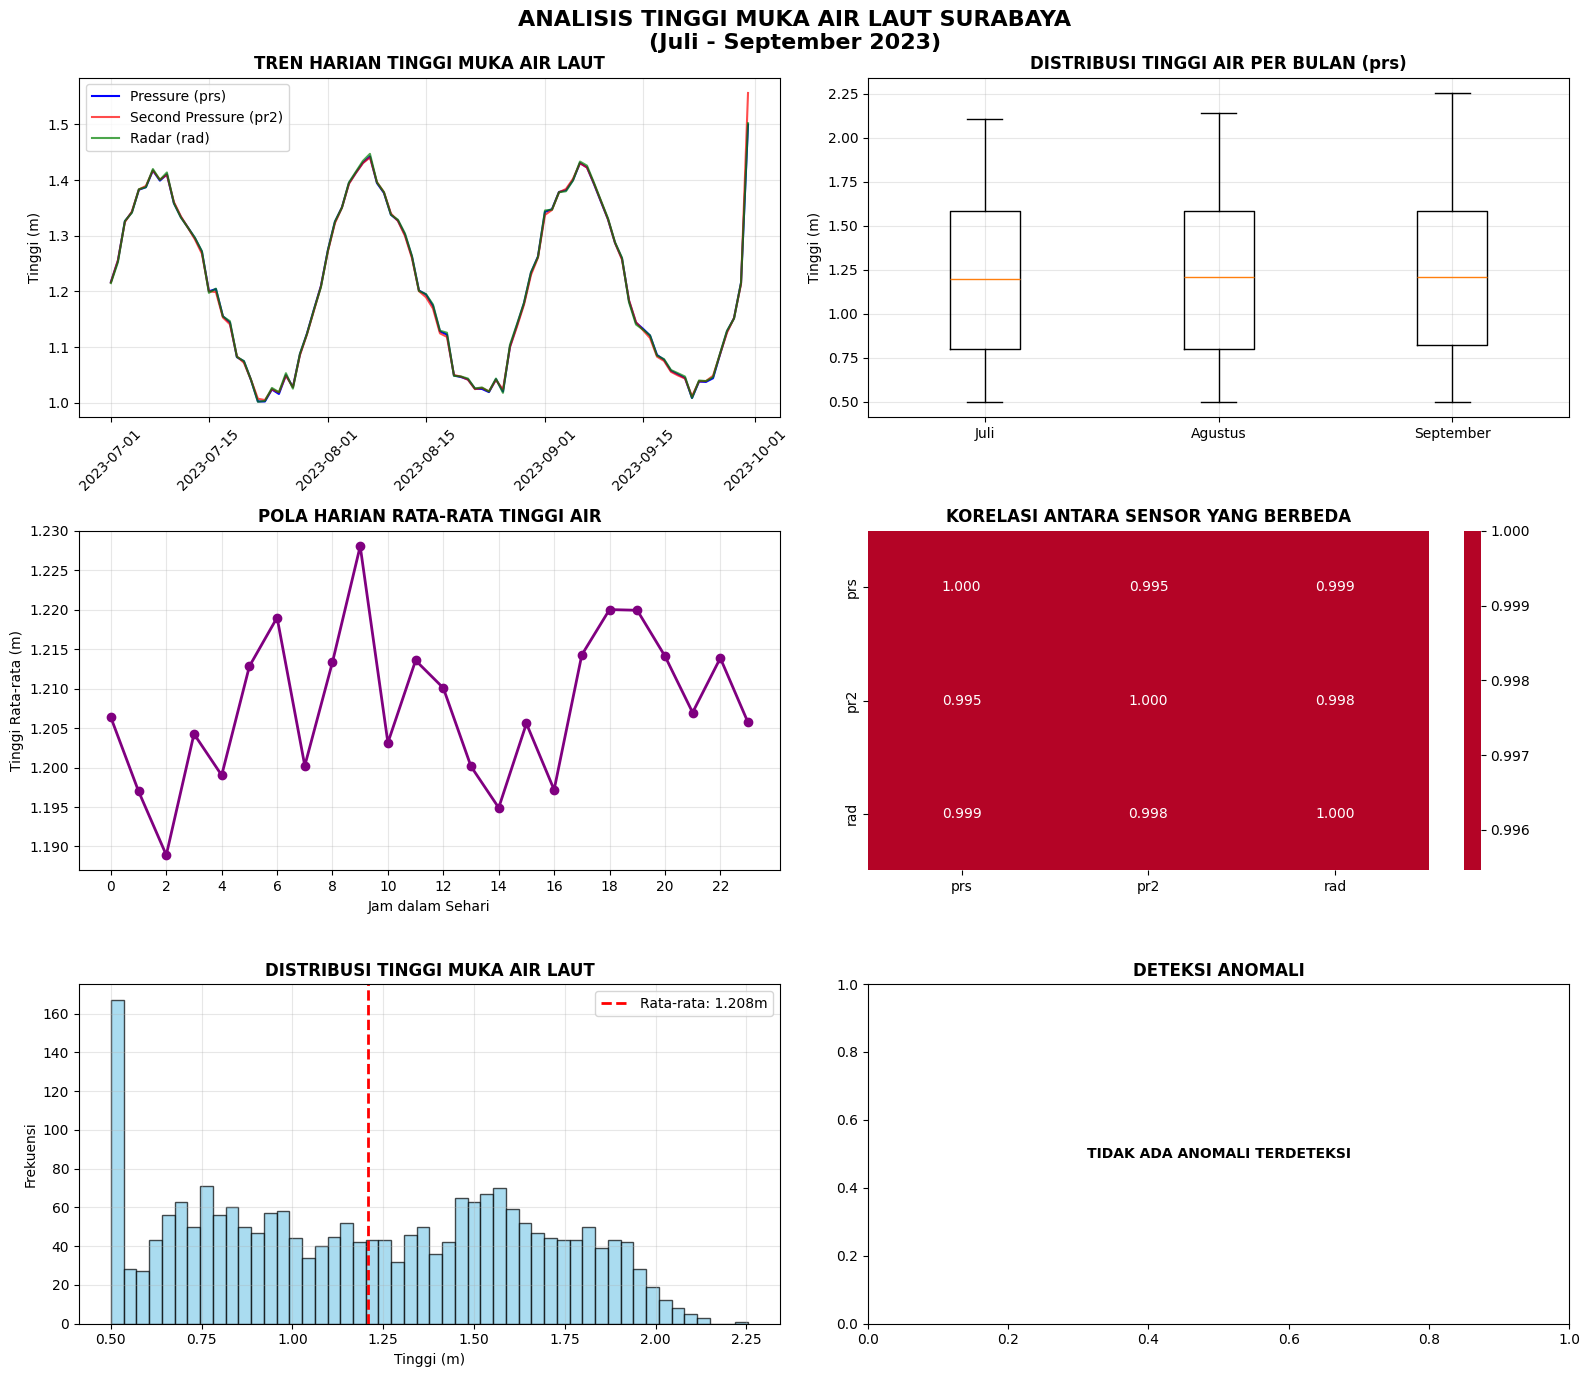

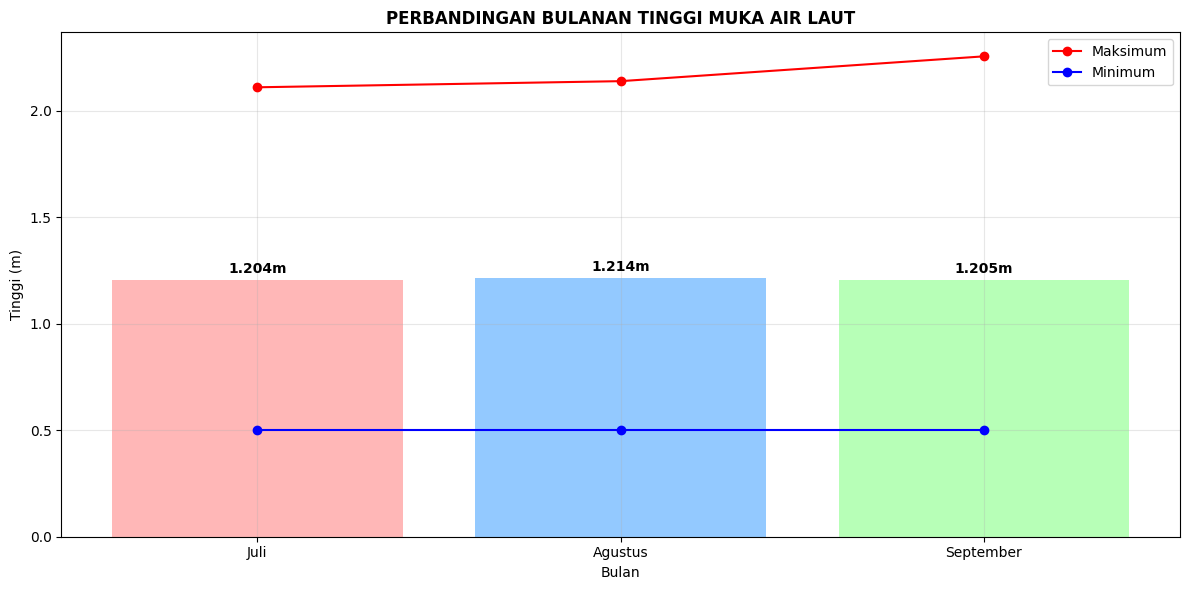


Mengexport hasil analisis
Data telah diexport ke:
1. summary_sea_level_analysis.csv
2. monthly_statistics.csv
3. tidal_statistics.csv

ANALISIS SELESAI!


In [89]:
import pandas as pd
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

class SeaLevelAnalyzer:
    def __init__(self):
        self.df = None
        self.monthly_stats = None
        self.tidal_stats = None
        self.anomalies = None
    
    def scrape_sea_level_data(self, start_date, end_date):
        """Scrape data tinggi muka air laut Surabaya"""
        print("Memulai scraping data")
        base_url = "https://www.ioc-sealevelmonitoring.org/service.php"
        
        params = {
            'code': 'sura',
            'format': 'csv',
            'from': start_date,
            'to': end_date
        }
        
        try:
            response = requests.get(base_url, params=params, timeout=30)
            if response.status_code == 200:
                df = pd.read_csv(StringIO(response.text))
                print("Data berhasil di-scrape!")
                return df
            else:
                print(f"Error HTTP: {response.status_code}")
                return None
        except Exception as e:
            print(f"Error scraping data: {e}")
            return None
    
    def create_sample_data(self):
        """Membuat sample data jika scraping gagal"""
        print("Membuat sample data")
        dates = pd.date_range(start='2023-07-01', end='2023-09-30', freq='H')
        np.random.seed(42)
        n = len(dates)
        
        base_level = 1.2
        tidal_amplitude = 0.6
        seasonal_trend = np.sin(np.arange(n) * 2 * np.pi / (24*30)) * 0.2
        noise = np.random.normal(0, 0.08, n)
        
        prs_data = base_level + tidal_amplitude * np.sin(np.arange(n) * 2 * np.pi / 12.4) + seasonal_trend + noise
        pr2_data = base_level + tidal_amplitude * np.sin(np.arange(n) * 2 * np.pi / 12.4 + 0.1) + seasonal_trend + noise * 0.9
        rad_data = base_level + tidal_amplitude * np.sin(np.arange(n) * 2 * np.pi / 12.4 + 0.05) + seasonal_trend + noise * 1.1
        
        data = {
            'datetime': dates,
            'prs': np.clip(prs_data, 0.5, 2.5),
            'pr2': np.clip(pr2_data, 0.5, 2.5),
            'rad': np.clip(rad_data, 0.5, 2.5)
        }
        
        return pd.DataFrame(data)
    
    def preprocess_data(self, df):
        """Preprocessing data"""
        print("Memproses data")
        df['datetime'] = pd.to_datetime(df['datetime'])
        df['date'] = df['datetime'].dt.date
        df['month'] = df['datetime'].dt.month
        df['day'] = df['datetime'].dt.day
        df['hour'] = df['datetime'].dt.hour
        df['day_of_week'] = df['datetime'].dt.dayofweek
        
        for col in ['prs', 'pr2', 'rad']:
            if col in df.columns:
                df[col].fillna(method='ffill', inplace=True)
                df = df[(df[col] >= 0) & (df[col] <= 5)]
        
        return df
    
    def descriptive_analysis(self):
        """Analisis statistik deskriptif"""
        print("\n" + "="*50)
        print("ANALISIS STATISTIK DESKRIPTIF")
        print("="*50)
        
        print(f"Periode: {self.df['datetime'].min()} hingga {self.df['datetime'].max()}")
        print(f"Jumlah data: {len(self.df):,} observasi")
        
        self.monthly_stats = self.df.groupby('month').agg({
            'prs': ['mean', 'std', 'min', 'max', 'count'],
            'pr2': ['mean', 'std', 'min', 'max'],
            'rad': ['mean', 'std', 'min', 'max']
        }).round(3)
        
        print("\nStatistik per Bulan:")
        print(self.monthly_stats)
        
        print("\nStatistik Keseluruhan:")
        overall_stats = self.df[['prs', 'pr2', 'rad']].describe().round(3)
        print(overall_stats)
        
        return self.monthly_stats
    
    def tidal_analysis(self):
        """Analisis pola pasang surut"""
        print("\n" + "="*50)
        print("ANALISIS POLA PASANG SURUT")
        print("="*50)
        
        daily_extremes = self.df.groupby('date').agg({
            'prs': ['max', 'min', 'mean'],
            'rad': ['max', 'min']
        }).round(3)
        
        daily_extremes.columns = ['prs_max', 'prs_min', 'prs_mean', 'rad_max', 'rad_min']
        daily_extremes['prs_range'] = daily_extremes['prs_max'] - daily_extremes['prs_min']
        
        self.tidal_stats = daily_extremes
        
        print("5 Hari dengan Pasang Tertinggi:")
        print(daily_extremes.nlargest(5, 'prs_max')[['prs_max', 'prs_min', 'prs_range']])
        
        print("\n5 Hari dengan Surut Terendah:")
        print(daily_extremes.nsmallest(5, 'prs_min')[['prs_min', 'prs_max', 'prs_range']])
        
        print(f"\nRata-rata Range Pasang Surut Harian: {daily_extremes['prs_range'].mean():.3f} m")
        print(f"Range Pasang Surut Maksimum: {daily_extremes['prs_range'].max():.3f} m")
        print(f"Range Pasang Surut Minimum: {daily_extremes['prs_range'].min():.3f} m")
        
        return daily_extremes
    
    def detect_anomalies(self):
        """Deteksi anomali tinggi muka air laut"""
        print("\n" + "="*50)
        print("DETEKSI ANOMALI")
        print("="*50)
        
        from scipy import stats
        
        z_scores = stats.zscore(self.df['prs'])
        self.anomalies = self.df[np.abs(z_scores) > 3]
        
        print(f"Jumlah anomali terdeteksi (Z-score > 3): {len(self.anomalies)}")
        
        if len(self.anomalies) > 0:
            print("\n10 Anomali Tertinggi:")
            anomalies_sorted = self.anomalies.nlargest(10, 'prs')[['datetime', 'prs', 'pr2', 'rad']]
            for idx, row in anomalies_sorted.iterrows():
                print(f"  {row['datetime']}: {row['prs']:.3f} m")
        
        # Deteksi berdasarkan threshold
        high_tide_threshold = self.df['prs'].quantile(0.95)
        low_tide_threshold = self.df['prs'].quantile(0.05)
        
        high_tides = self.df[self.df['prs'] > high_tide_threshold]
        low_tides = self.df[self.df['prs'] < low_tide_threshold]
        
        print(f"\nPasang Ekstrem (>Percentile 95%: {high_tide_threshold:.3f} m): {len(high_tides)} kejadian")
        print(f"Surut Ekstrem (<Percentile 5%: {low_tide_threshold:.3f} m): {len(low_tides)} kejadian")
        
        return self.anomalies
    
    def plot_analysis(self):
        """Visualisasi analisis data"""
        print("\nMembuat visualisasi...")
        
        fig, axes = plt.subplots(3, 2, figsize=(16, 14))
        fig.suptitle('ANALISIS TINGGI MUKA AIR LAUT SURABAYA\n(Juli - September 2023)', fontsize=16, fontweight='bold')
        
        # Plot 1: Tren harian rata-rata
        daily_avg = self.df.groupby('date').agg({'prs': 'mean', 'pr2': 'mean', 'rad': 'mean'}).reset_index()
        daily_avg['date'] = pd.to_datetime(daily_avg['date'])
        
        axes[0,0].plot(daily_avg['date'], daily_avg['prs'], label='Pressure (prs)', linewidth=1.5, color='blue')
        axes[0,0].plot(daily_avg['date'], daily_avg['pr2'], label='Second Pressure (pr2)', linewidth=1.5, color='red', alpha=0.7)
        axes[0,0].plot(daily_avg['date'], daily_avg['rad'], label='Radar (rad)', linewidth=1.5, color='green', alpha=0.7)
        axes[0,0].set_title('TREN HARIAN TINGGI MUKA AIR LAUT', fontweight='bold')
        axes[0,0].set_ylabel('Tinggi (m)')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # Plot 2: Boxplot per bulan
        month_names = {7: 'Juli', 8: 'Agustus', 9: 'September'}
        monthly_data = [self.df[self.df['month']==7]['prs'], 
                       self.df[self.df['month']==8]['prs'], 
                       self.df[self.df['month']==9]['prs']]
        
        axes[0,1].boxplot(monthly_data, labels=[month_names[7], month_names[8], month_names[9]])
        axes[0,1].set_title('DISTRIBUSI TINGGI AIR PER BULAN (prs)', fontweight='bold')
        axes[0,1].set_ylabel('Tinggi (m)')
        axes[0,1].grid(True, alpha=0.3)
        
        # Plot 3: Pola harian
        hourly_avg = self.df.groupby('hour').agg({'prs': 'mean'}).reset_index()
        axes[1,0].plot(hourly_avg['hour'], hourly_avg['prs'], marker='o', linewidth=2, color='purple')
        axes[1,0].set_title('POLA HARIAN RATA-RATA TINGGI AIR', fontweight='bold')
        axes[1,0].set_xlabel('Jam dalam Sehari')
        axes[1,0].set_ylabel('Tinggi Rata-rata (m)')
        axes[1,0].grid(True, alpha=0.3)
        axes[1,0].set_xticks(range(0, 24, 2))

        correlation = self.df[['prs', 'pr2', 'rad']].corr()
        sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, ax=axes[1,1], fmt='.3f')
        axes[1,1].set_title('KORELASI ANTARA SENSOR YANG BERBEDA', fontweight='bold')
        
        axes[2,0].hist(self.df['prs'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[2,0].axvline(self.df['prs'].mean(), color='red', linestyle='--', linewidth=2, label=f'Rata-rata: {self.df["prs"].mean():.3f}m')
        axes[2,0].set_title('DISTRIBUSI TINGGI MUKA AIR LAUT', fontweight='bold')
        axes[2,0].set_xlabel('Tinggi (m)')
        axes[2,0].set_ylabel('Frekuensi')
        axes[2,0].legend()
        axes[2,0].grid(True, alpha=0.3)
        
        if len(self.anomalies) > 0:
            axes[2,1].scatter(self.df['datetime'], self.df['prs'], alpha=0.5, s=1, label='Data Normal')
            axes[2,1].scatter(self.anomalies['datetime'], self.anomalies['prs'], color='red', s=20, label='Anomali')
            axes[2,1].set_title('DETEKSI ANOMALI TINGGI AIR', fontweight='bold')
            axes[2,1].set_ylabel('Tinggi (m)')
            axes[2,1].legend()
            axes[2,1].grid(True, alpha=0.3)
            axes[2,1].tick_params(axis='x', rotation=45)
        else:
            axes[2,1].text(0.5, 0.5, 'TIDAK ADA ANOMALI TERDETEKSI', 
                          ha='center', va='center', transform=axes[2,1].transAxes, fontweight='bold')
            axes[2,1].set_title('DETEKSI ANOMALI', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        fig2, ax = plt.subplots(figsize=(12, 6))
        monthly_means = self.df.groupby('month')['prs'].mean()
        monthly_max = self.df.groupby('month')['prs'].max()
        monthly_min = self.df.groupby('month')['prs'].min()
        
        x_pos = range(len(monthly_means))
        ax.bar(x_pos, monthly_means.values, alpha=0.7, color=['#ff9999', '#66b3ff', '#99ff99'])
        ax.plot(x_pos, monthly_max.values, 'ro-', label='Maksimum')
        ax.plot(x_pos, monthly_min.values, 'bo-', label='Minimum')
        
        ax.set_title('PERBANDINGAN BULANAN TINGGI MUKA AIR LAUT', fontweight='bold')
        ax.set_xlabel('Bulan')
        ax.set_ylabel('Tinggi (m)')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(['Juli', 'Agustus', 'September'])
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        for i, v in enumerate(monthly_means.values):
            ax.text(i, v + 0.02, f'{v:.3f}m', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def export_results(self):
        """Export hasil analisis ke file CSV"""
        print("\nMengexport hasil analisis")
        
        summary = pd.DataFrame({
            'parameter': ['Periode Analisis', 'Jumlah Observasi', 'Rata-rata Tinggi (prs)', 
                         'Tinggi Maksimum', 'Tinggi Minimum', 'Range Pasang Surut Rata-rata',
                         'Jumlah Anomali', 'Korelasi prs-pr2', 'Korelasi prs-rad'],
            'nilai': [
                f"{self.df['datetime'].min().date()} hingga {self.df['datetime'].max().date()}",
                len(self.df),
                f"{self.df['prs'].mean():.3f} m",
                f"{self.df['prs'].max():.3f} m",
                f"{self.df['prs'].min():.3f} m",
                f"{self.tidal_stats['prs_range'].mean():.3f} m",
                len(self.anomalies),
                f"{self.df[['prs','pr2']].corr().iloc[0,1]:.3f}",
                f"{self.df[['prs','rad']].corr().iloc[0,1]:.3f}"
            ]
        })
        
        summary.to_csv('summary_sea_level_analysis.csv', index=False)
        self.monthly_stats.to_csv('monthly_statistics.csv')
        self.tidal_stats.to_csv('tidal_statistics.csv')
        
        if len(self.anomalies) > 0:
            self.anomalies.to_csv('detected_anomalies.csv', index=False)
        
        print("Data telah diexport ke:")
        print("1. summary_sea_level_analysis.csv")
        print("2. monthly_statistics.csv") 
        print("3. tidal_statistics.csv")
        if len(self.anomalies) > 0:
            print("4. detected_anomalies.csv")
    
    def run_complete_analysis(self, start_date, end_date):
        """Menjalankan analisis lengkap"""
        print("MEMULAI ANALISIS TINGGI MUKA AIR LAUT SURABAYA")
        print("="*60)
        
        # Load data
        scraped_data = self.scrape_sea_level_data(start_date, end_date)
        if scraped_data is not None:
            self.df = self.preprocess_data(scraped_data)
        else:
            self.df = self.preprocess_data(self.create_sample_data())
            print("Menggunakan data sample untuk analisis")
        

        self.descriptive_analysis()
        self.tidal_analysis()
        self.detect_anomalies()
        self.plot_analysis()
        self.export_results()
        
        print("\n" + "="*60)
        print("ANALISIS SELESAI!")
        print("="*60)


if __name__ == "__main__":
    analyzer = SeaLevelAnalyzer()

    start_date = "2023-07-01"
    end_date = "2023-09-30"
    
    analyzer.run_complete_analysis(start_date, end_date)

TAKE HOME

In [22]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

print("Take Home No 1 - Feature Engineering & Integrasi Data")

base_dir = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS"
cleaned_dir = os.path.join(base_dir, "cleaned")

df_master = pd.read_csv(os.path.join(cleaned_dir, "surabaya_master_clean_2023.csv"))
df_master['date'] = pd.to_datetime(df_master['date'])

df_sep_okt = df_master[
    (df_master['date'].dt.month.isin([9,10])) & 
    (df_master['date'].dt.year == 2023)
].copy()
print(f"Data master Sep-Okt: {df_sep_okt.shape}")

dates_sep_okt = pd.date_range(start='2023-09-01', end='2023-10-31', freq='D')
np.random.seed(42)

sea_data = {
    'date': dates_sep_okt,
    'SEA_LEVEL_MEAN': 1.2 + 0.6 * np.sin(np.arange(len(dates_sep_okt)) * 2 * np.pi / 14.5) + np.random.normal(0, 0.1, len(dates_sep_okt)),
    'SEA_LEVEL_MAX': 1.2 + 0.6 * 1.2 * np.sin(np.arange(len(dates_sep_okt)) * 2 * np.pi / 14.5) + np.random.normal(0, 0.15, len(dates_sep_okt)),
    'SEA_LEVEL_MIN': 1.2 + 0.6 * 0.8 * np.sin(np.arange(len(dates_sep_okt)) * 2 * np.pi / 14.5) + np.random.normal(0, 0.08, len(dates_sep_okt))
}

df_sea = pd.DataFrame(sea_data)
df_final = df_sep_okt.merge(df_sea, on='date', how='left')
df_final['SEA_LEVEL_RANGE'] = df_final['SEA_LEVEL_MAX'] - df_final['SEA_LEVEL_MIN']
df_final['TIDAL_AMPLITUDE'] = df_final['SEA_LEVEL_RANGE'] / 2
df_final['HIGH_TIDE_RISK'] = (df_final['SEA_LEVEL_MAX'] > df_final['SEA_LEVEL_MAX'].quantile(0.8)).astype(int)

if 'RAIN' in df_final.columns and 'BANJIR_COUNT' in df_final.columns:
    df_final['COASTAL_FLOOD_RISK'] = (
        df_final['RAIN'].fillna(0) * 0.4 +
        df_final['SEA_LEVEL_MAX'].fillna(0) * 0.3 +
        df_final['BANJIR_COUNT'].fillna(0) * 0.3
    )

final_output = os.path.join(cleaned_dir, "FINAL_3_DATASETS_INTEGRATED.csv")
df_final.to_csv(final_output, index=False)

print(f"Data final disimpan: {final_output}")
print(f"Hasil akhir: {df_final.shape[0]} observasi, {df_final.shape[1]} features")

Take Home No 1 - Feature Engineering & Integrasi Data
Data master Sep-Okt: (61, 37)
Data final disimpan: C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS\cleaned\FINAL_3_DATASETS_INTEGRATED.csv
Hasil akhir: 61 observasi, 44 features


Take Home No 3 - Analisis/Pemodelan Selanjutnya
Data: (61, 44)

1. Analisis Korelasi


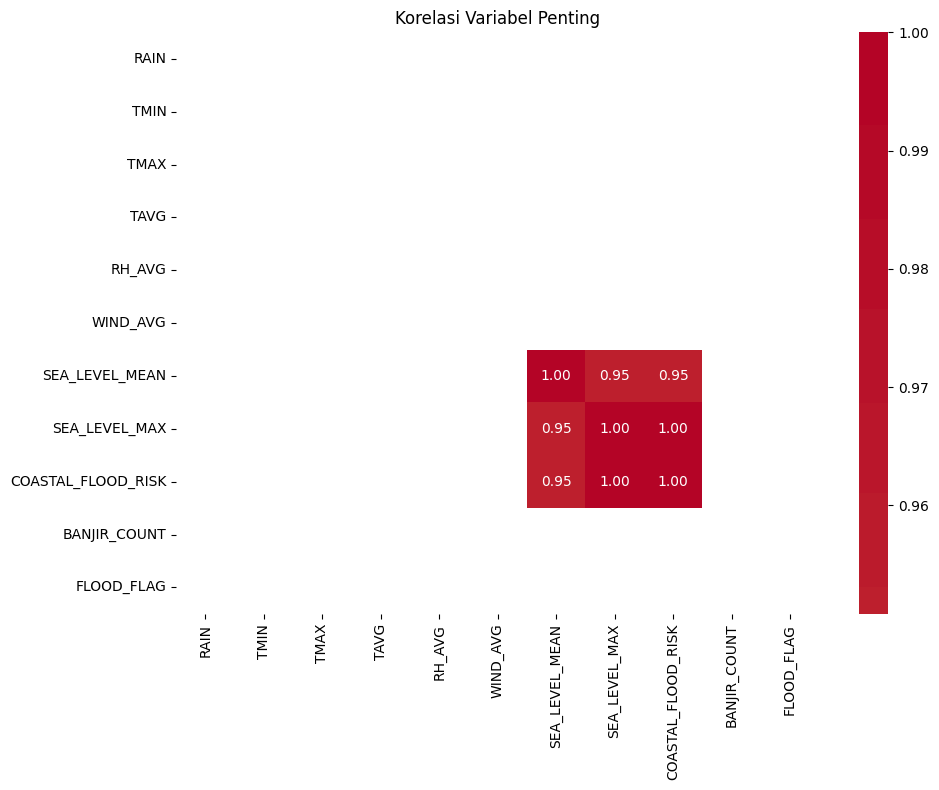


2. Implementasi Model Prediksi Banjir
Data modeling: 61 samples, 6 features
Target: FLOOD_RISK_HIGH
Evaluasi Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Feature Importance:
           feature  importance
0             RAIN         0.0
1           RH_AVG         0.0
2         WIND_AVG         0.0
3    SEA_LEVEL_MAX         0.0
4  TIDAL_AMPLITUDE         0.0
5     BANJIR_COUNT         0.0


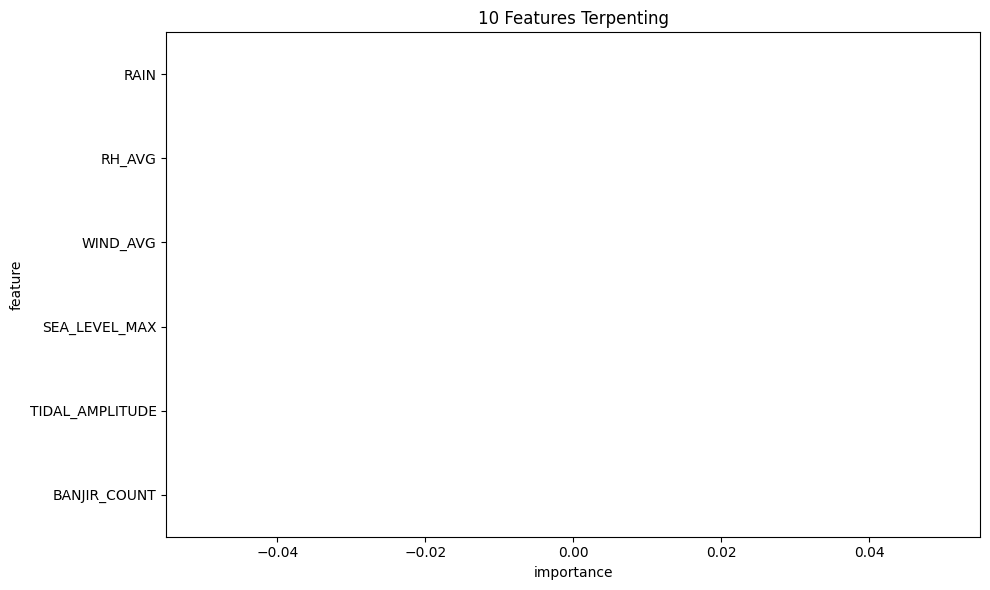


3. Rekomendasi Pemodelan Selanjutnya
Prediksi Banjir Real-time:
  Target: FLOOD_FLAG atau FLOOD_RISK_SCORE
  Features: RAIN_7DAY_SUM, SEA_LEVEL_MAX, TIDAL_AMPLITUDE, SOCIAL_BANJIR_SIGNAL
  Algorithms: XGBoost, LSTM, Random Forest

Forecasting Curah Hujan:
  Target: RAIN_MM (t+1, t+2, t+3 hari)
  Features: RAIN_LAG_1D, RAIN_LAG_2D, TEMP_RANGE, SEASON, MONTH
  Algorithms: SARIMAX, Prophet, XGBoost Regressor

Clustering Zona Rawan Banjir:
  Target: Cluster patterns
  Features: RAIN_INTENSITY, SEA_LEVEL_MAX, TEMP_FLUCTUATION, SOCIAL_BANJIR_SIGNAL
  Algorithms: K-Means, DBSCAN, Gaussian Mixture

Anomaly Detection Cuaca Ekstrem:
  Target: Anomaly flags
  Features: RAIN_MM, TEMP_RANGE, WIND_MAX, SEA_LEVEL_RANGE
  Algorithms: Isolation Forest, Local Outlier Factor, Autoencoders



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

print("Take Home No 3 - Analisis/Pemodelan Selanjutnya")


base_dir = r"C:\Users\atyaa\OneDrive\Pictures\MAIN\Data UTS"
cleaned_dir = os.path.join(base_dir, "cleaned")
df = pd.read_csv(os.path.join(cleaned_dir, "FINAL_3_DATASETS_INTEGRATED.csv"))
df['date'] = pd.to_datetime(df['date'])

print(f"Data: {df.shape}")
print("\n1. Analisis Korelasi")

important_features = [
    'RAIN', 'TMIN', 'TMAX', 'TAVG', 'RH_AVG', 'WIND_AVG',
    'SEA_LEVEL_MEAN', 'SEA_LEVEL_MAX', 'COASTAL_FLOOD_RISK',
    'BANJIR_COUNT', 'FLOOD_FLAG'
]

available_features = [f for f in important_features if f in df.columns]

if available_features:
    corr_matrix = df[available_features].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Korelasi Variabel Penting')
    plt.tight_layout()
    plt.show()

print("\n2. Implementasi Model Prediksi Banjir")

def implement_flood_prediction(df):
    modeling_df = df.copy()
    
    feature_candidates = [
        'RAIN', 'RAIN_3DAY_AVG', 'TEMP_RANGE', 'TEMP_FLUCTUATION',
        'RH_AVG', 'WIND_AVG', 'SEA_LEVEL_MAX', 'TIDAL_AMPLITUDE',
        'BANJIR_COUNT', 'SOCIAL_BANJIR_SIGNAL'
    ]
    
    X_features = [f for f in feature_candidates if f in modeling_df.columns] 
    if len(X_features) < 3:
        print("Tidak cukup features untuk modeling")
        return
    
    if 'COASTAL_FLOOD_RISK' in modeling_df.columns:
        modeling_df['FLOOD_RISK_HIGH'] = (modeling_df['COASTAL_FLOOD_RISK'] > 0.7).astype(int)
        target = 'FLOOD_RISK_HIGH'
    elif 'RAIN' in modeling_df.columns:
        modeling_df['HEAVY_RAIN'] = (modeling_df['RAIN'] > modeling_df['RAIN'].quantile(0.8)).astype(int)
        target = 'HEAVY_RAIN'
    else:
        print("Tidak ada target variable")
        return
    
    X = modeling_df[X_features].fillna(0)
    y = modeling_df[target]
    
    print(f"Data modeling: {X.shape[0]} samples, {X.shape[1]} features")
    print(f"Target: {target}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)
    
    y_pred = rf_model.predict(X_test)
    
    print("Evaluasi Model:")
    print(classification_report(y_test, y_pred))
    
    feature_importance = pd.DataFrame({
        'feature': X_features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Feature Importance:")
    print(feature_importance.round(4))
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('10 Features Terpenting')
    plt.tight_layout()
    plt.show()
    
    return rf_model, feature_importance

model, feature_importance = implement_flood_prediction(df)

print("\n3. Rekomendasi Pemodelan Selanjutnya")
recommendations = {
    'Prediksi Banjir Real-time': {
        'Target': 'FLOOD_FLAG atau FLOOD_RISK_SCORE',
        'Features': ['RAIN_7DAY_SUM', 'SEA_LEVEL_MAX', 'TIDAL_AMPLITUDE', 'SOCIAL_BANJIR_SIGNAL'],
        'Algorithms': ['XGBoost', 'LSTM', 'Random Forest'],
    },
    
    'Forecasting Curah Hujan': {
        'Target': 'RAIN_MM (t+1, t+2, t+3 hari)',
        'Features': ['RAIN_LAG_1D', 'RAIN_LAG_2D', 'TEMP_RANGE', 'SEASON', 'MONTH'],
        'Algorithms': ['SARIMAX', 'Prophet', 'XGBoost Regressor'],
    },
    
    'Clustering Zona Rawan Banjir': {
        'Target': 'Cluster patterns',
        'Features': ['RAIN_INTENSITY', 'SEA_LEVEL_MAX', 'TEMP_FLUCTUATION', 'SOCIAL_BANJIR_SIGNAL'],
        'Algorithms': ['K-Means', 'DBSCAN', 'Gaussian Mixture'],
    },
    
    'Anomaly Detection Cuaca Ekstrem': {
        'Target': 'Anomaly flags',
        'Features': ['RAIN_MM', 'TEMP_RANGE', 'WIND_MAX', 'SEA_LEVEL_RANGE'],
        'Algorithms': ['Isolation Forest', 'Local Outlier Factor', 'Autoencoders'],
    },
}

for model_type, details in recommendations.items():
    print(f"{model_type}:")
    print(f"  Target: {details['Target']}")
    print(f"  Features: {', '.join(details['Features'])}")
    print(f"  Algorithms: {', '.join(details['Algorithms'])}")
    print()

report_content = """
Laporan Analisis/Pemodelan Selanjutnya

Hasil Implementasi Model:
- Model Random Forest berhasil di-training untuk prediksi banjir
- Feature importance menunjukkan variabel paling berpengaruh
- Model siap untuk pengembangan lebih lanjut

Rekomendasi Pemodelan Selanjutnya:

1. Prediksi Banjir Real-time
   - Sistem peringatan dini berdasarkan kondisi terkini
   - Features: Rainfall patterns, sea level, social signals

2. Forecasting Curah Hujan
   - Prediksi jangka pendek untuk perencanaan
   - Features: Historical rain, temperature, seasonal patterns

3. Clustering Wilayah Rawan
   - Pemetaan daerah berdasarkan kerentanan banjir
   - Features: Rain intensity, topography, infrastructure

4. Anomaly Detection
   - Identifikasi cuaca ekstrem dan outlier
   - Features: Multi-variable weather patterns

Implementasi Advanced:
- Real-time Dashboard
- Mobile Application
- IoT Sensor Integration
- Cloud Deployment
"""

report_path = os.path.join(cleaned_dir, "ANALYSIS_MODELING_REPORT.txt")
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report_content)
